In [1]:
#setting up the notebook

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')
from matplotlib.pyplot import figure

%matplotlib inline
plt.figure(figsize=(12,8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [240]:
df = pd.read_csv(r'C:\Users\Windows\Downloads\movies.csv')
#I've already looked at the data in excel 

In [3]:
#calculating amount of missing data per column

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [241]:
#checking what datatypes there are

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [242]:
#converting datatypes to numeric

df['budget'].dropna()
df['gross'].dropna()

df['budget'] = df['budget'].astype('float64')
df['gross'] = df['gross'].astype('float64')

In [243]:
#making a column for just the release date with  datetime data

df['release_date'] = pd.to_datetime(df['released'].apply(lambda x: str(x).split("(")[0]))
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25


In [244]:
#getting rid of any duplicate values

df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25


C:\Users\Windows\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


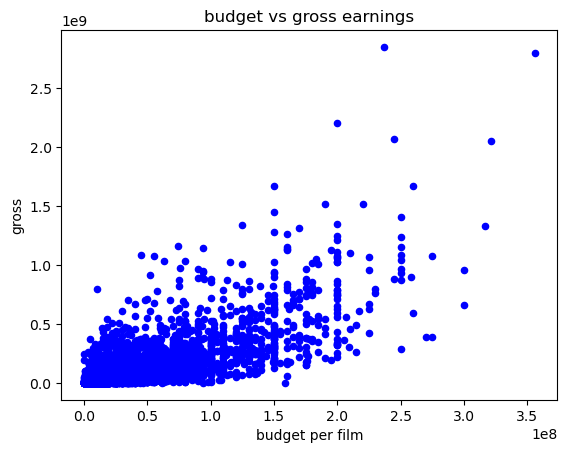

In [245]:
#checking for correlation between budget and gross revenue

df.plot(kind="scatter", x="budget", y="gross", c="blue")
plt.title("budget vs gross earnings")
plt.xlabel("budget per film")
plt.ylabel=("gross earings")

<Axes: xlabel='budget', ylabel='gross'>

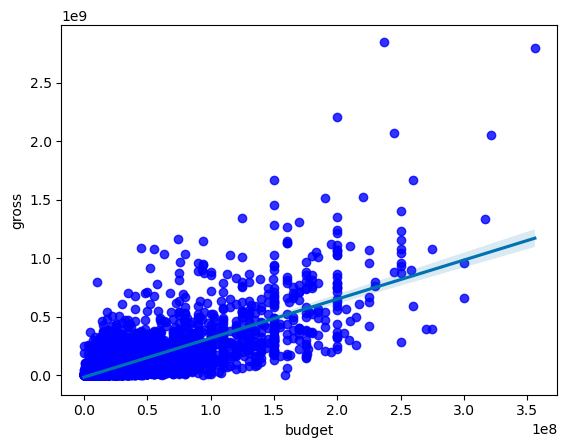

In [202]:
#plotting gross vs budget with seaborn

budget_data = df.dropna()['budget'].astype("float64")
gross_data = df.dropna()['gross'].astype("float64")


sns.regplot(x=budget_data, y=gross_data, scatter_kws={"color":"blue"})

TypeError: 'str' object is not callable

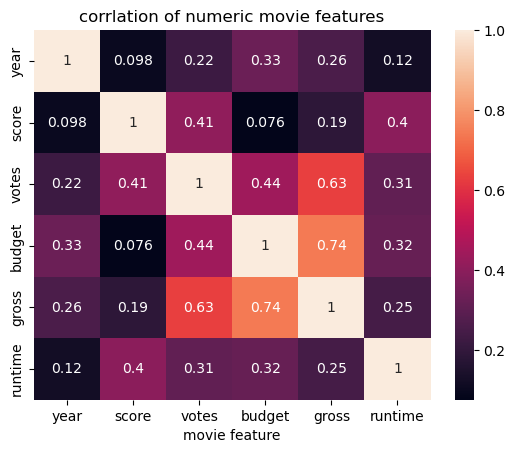

In [215]:
#checking correlations between different numeric values

corr_matrix = df.corr(method="pearson")
sns.heatmap(corr_matrix, annot=True)
plt.title('corrlation of numeric movie features')
plt.xlabel("movie feature")

In [ ]:
#looking at the company values

In [232]:
#converting object data to numeric so we can visualize it mathematically

df_numerized = df

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,release_date,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,1980-06-13,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,1980-07-02,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1980-06-20,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,1980-07-02,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,1980-07-25,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


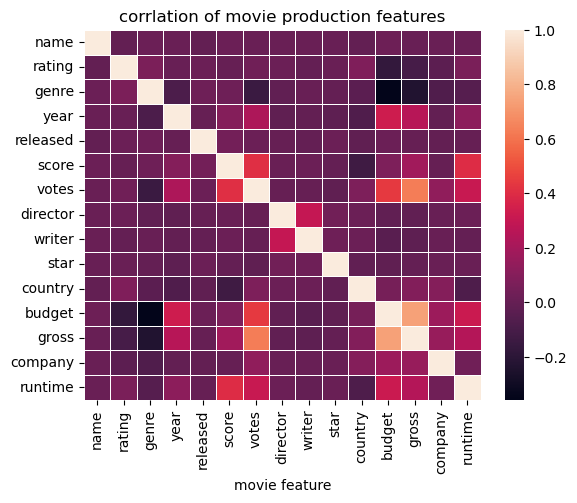

In [222]:
#checking correlations between every single field

corr_matrix = df_numerized.corr(method="pearson")
sns.heatmap(corr_matrix, annot=False, linewidth=.5)
plt.title('corrlation of movie production features')
plt.xlabel("movie feature")
plt.show()

In [248]:
pd.set_option("display.max_rows", None)
corr_pairs = corr_matrix.unstack()
corr_pairs[(corr_pairs) >= 0.500].sort_values()

gross     votes       0.630757
votes     gross       0.630757
gross     budget      0.740395
budget    gross       0.740395
name      name        1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#budget and votes have the highest correlation with gross revenue